<a href="https://colab.research.google.com/github/mervenurerdogan/BTC-USD_Price-_Prediction_LSTM/blob/main/DollarPricePredict_LSTM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt


In [2]:
dollar_path='/content/drive/MyDrive/USD_DATA/USD.csv'

In [3]:
data=pd.read_csv(dollar_path, date_parser=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-03-06,4.010417,4.029583,3.917083,3.917083,3.793007,211200
1,2015-03-09,3.928750,3.934583,3.909583,3.930417,3.805918,86400
2,2015-03-10,3.882083,3.888333,3.755000,3.781250,3.661476,276000
3,2015-03-11,3.825000,3.893750,3.817500,3.830417,3.709086,105600
4,2015-03-12,3.719167,3.767083,3.635833,3.715000,3.597324,331200
...,...,...,...,...,...,...,...
1780,2022-03-30,43.750000,44.000000,41.150002,41.529999,41.529999,186300
1781,2022-03-31,41.520000,42.130001,39.799999,39.959999,39.959999,215400
1782,2022-04-01,40.250000,40.299999,37.130001,38.320000,38.320000,295200
1783,2022-04-04,38.520000,39.959999,38.299999,39.849998,39.849998,181100


In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-03-06,4.010417,4.029583,3.917083,3.917083,3.793007,211200
1,2015-03-09,3.928750,3.934583,3.909583,3.930417,3.805918,86400
2,2015-03-10,3.882083,3.888333,3.755000,3.781250,3.661476,276000
3,2015-03-11,3.825000,3.893750,3.817500,3.830417,3.709086,105600
4,2015-03-12,3.719167,3.767083,3.635833,3.715000,3.597324,331200


In [6]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1780,2022-03-30,43.750000,44.000000,41.150002,41.529999,41.529999,186300
1781,2022-03-31,41.520000,42.130001,39.799999,39.959999,39.959999,215400
1782,2022-04-01,40.250000,40.299999,37.130001,38.320000,38.320000,295200
1783,2022-04-04,38.520000,39.959999,38.299999,39.849998,39.849998,181100
1784,2022-04-05,39.330002,39.340000,36.130001,36.310001,36.310001,329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1785 non-null   object 
 1   Open       1785 non-null   float64
 2   High       1785 non-null   float64
 3   Low        1785 non-null   float64
 4   Close      1785 non-null   float64
 5   Adj Close  1785 non-null   float64
 6   Volume     1785 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 97.7+ KB


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1.785000e+03
mean,13.990793,14.255460,13.669206,13.971797,13.876243,1.582318e+05
std,11.945597,12.230573,11.581904,11.916082,11.962331,1.745477e+05
min,2.423750,2.500833,2.166667,2.407500,2.334520,0.000000e+00
25%,5.575000,5.619583,5.497917,5.562083,5.414639,6.960000e+04
50%,10.475833,10.625000,10.257500,10.440000,10.281868,1.164000e+05
75%,16.232500,16.350000,15.852500,16.172501,16.128254,1.940000e+05
max,56.669998,58.410000,54.500000,56.220001,56.220001,3.158400e+06


In [9]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1780,False,False,False,False,False,False,False
1781,False,False,False,False,False,False,False
1782,False,False,False,False,False,False,False
1783,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
start_date=data.iloc[0][0]
end_date=data.iloc[-1][0]

print('Start_Date',start_date)
print('Finish_Date',end_date)

Start_Date 2015-03-06
Finish_Date 2022-04-05


In [12]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')


In [13]:
data.index=data.Date

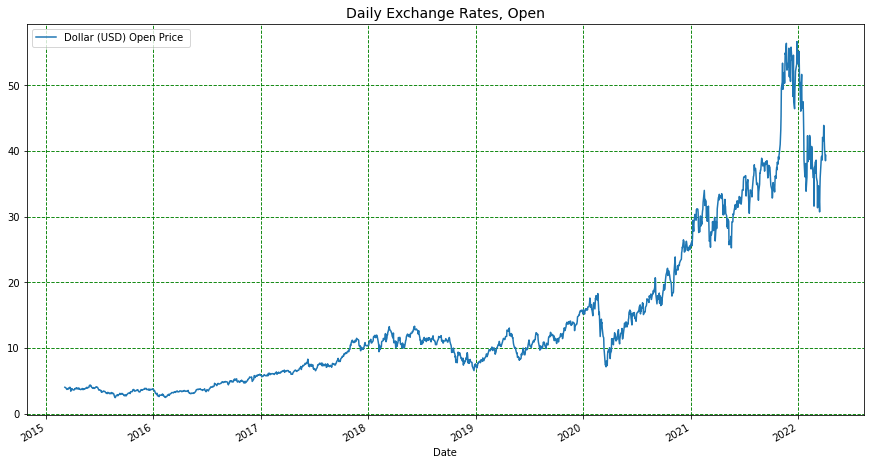

In [14]:
fig = plt.figure(figsize=(15,8))
data.Open.plot(label='Dollar (USD) Open Price ')
plt.legend(loc='best')
plt.title('Daily Exchange Rates, Open', fontsize=14)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.9)
plt.show()

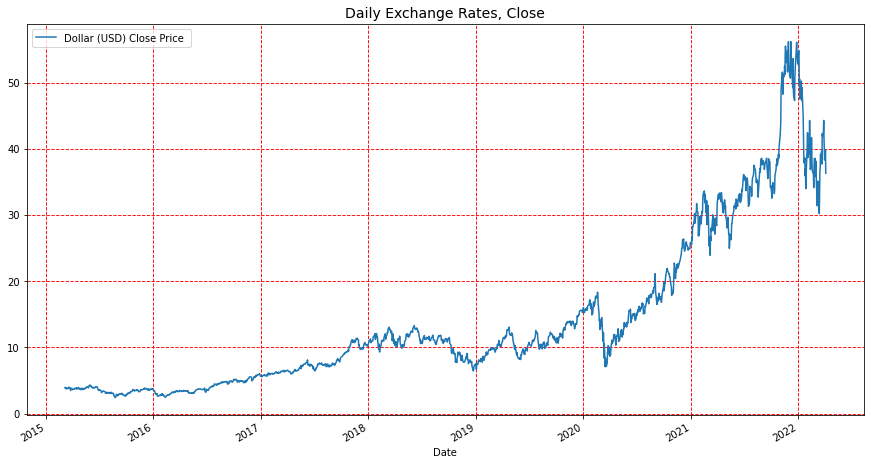

In [15]:
fig = plt.figure(figsize=(15,8))
data.Close.plot(label='Dollar (USD) Close Price ')
plt.legend(loc='best')
plt.title('Daily Exchange Rates, Close', fontsize=14)
plt.grid(color = 'red', linestyle = '--', linewidth = 0.9)
plt.show()

In [16]:
values = data['Open'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(values)

#verilerimizi 0-1 arasında ölçeklendirme yaptık

In [17]:
dataset[0:5]
#ölçeklendirme yapmış olduğumuz verileri kontrol ediyoruz

array([[0.02924934],
       [0.02774386],
       [0.02688358],
       [0.02583129],
       [0.02388031]], dtype=float32)

In [18]:
train_size_rate=0.70 #eğitim için elimizde olan verilerin %70 ını kullanacağız

In [19]:
train_size=int(len(dataset)*train_size_rate)

In [20]:
test_size=len(dataset)-train_size
# toplam veriden eğitim verilerini çıkartıtğımızada geriye kalan %30 lık kısmı test için kullanacağız

In [21]:
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]


In [22]:
print("Veri(Gün Sayısı) Sayıları (training set, test set): " + str((len(train), len(test))))


Veri(Gün Sayısı) Sayıları (training set, test set): (1249, 536)


In [23]:
#verisetini adım,adım okutup daha anlaşılır hale getirmek istiyoruz.
#Asıl amaç son güne bakıp diğer günü tahmin edebilmek
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [24]:
# Verisetlerimizi Oluşturalım
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

Original training data shape:
(1247, 1)


In [25]:
# Yeni verisetinin şekline bakalım.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)
#bu şekilde üç kanal olmasının sebebi model eğitiminde kullanacağımız LSTM yapısından kaynaklanıyor

New training data shape:
(1247, 1, 1)


In [26]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

In [29]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    model.add(LSTM(100,input_shape = (1, window_size)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error",optimizer = "adam")
   #30 epoch yani 30 kere verisetine bakılacak.
    model.fit(train_X, 
              train_Y, 
              epochs = 30, 
              batch_size = 1, 
              verbose = 1)
    
    return(model)

In [30]:
# Fit  model.
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/30
1247/1247 [==============================] - 8s 5ms/step - loss: 9.3730e-04
Epoch 2/30
1247/1247 [==============================] - 6s 5ms/step - loss: 7.0645e-05
Epoch 3/30
1247/1247 [==============================] - 6s 5ms/step - loss: 7.6247e-05
Epoch 4/30
1247/1247 [==============================] - 6s 5ms/step - loss: 7.0257e-05
Epoch 5/30
1247/1247 [==============================] - 6s 5ms/step - loss: 6.6008e-05
Epoch 6/30
1247/1247 [==============================] - 6s 5ms/step - loss: 6.1499e-05
Epoch 7/30
1247/1247 [==============================] - 6s 5ms/step - loss: 5.7517e-05
Epoch 8/30
1247/1247 [==============================] - 7s 6ms/step - loss: 5.7174e-05
Epoch 9/30
1247/1247 [==============================] - 6s 5ms/step - loss: 5.6304e-05
Epoch 10/30
1247/1247 [==============================] - 6s 5ms/step - loss: 5.8576e-05
Epoch 11/30
1247/1247 [==============================] - 6s 5ms/step - loss: 5.9753e-05
Epoch 12/30
1247/1247 [==================

In [31]:
import math
def predict_and_score(model, X, Y):
    # Şimdi tahminleri 0-1 ile scale edilmiş halinden geri çeviriyoruz.
    pred = scaler.inverse_transform(model.predict(X))
    orig_data = scaler.inverse_transform([Y])
    # Rmse değerlerini ölçüyoruz.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)


In [32]:
rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)

rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 0.29 RMSE
Test data score: 1.64 RMSE


In [35]:
# Öğrendiklerinini tahminletip ekliyoruz.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

In [36]:
# Şimdi ise testleri tahminletiyoruz.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

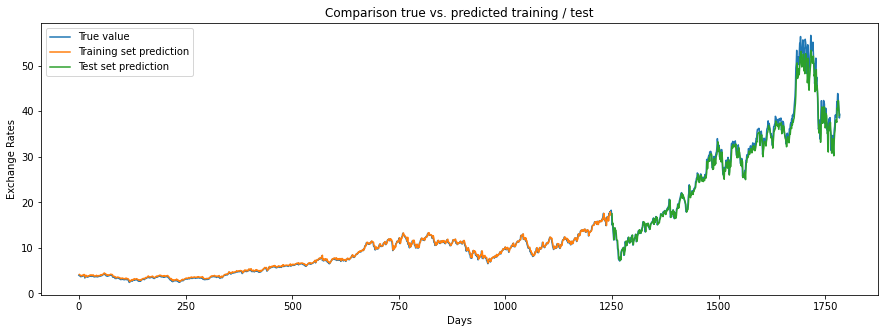

In [37]:


# Plot'u oluşturalım.
plt.figure(figsize = (15, 5))
plt.plot(scaler.inverse_transform(dataset), label = "True value")
plt.plot(train_predict_plot, label = "Training set prediction")
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Days")
plt.ylabel("Exchange Rates")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()